# Modelo de Classificação de Depressão em Áreas Rurais

- Dataset para o desenvolvemento pego na plataforma [Kaggle](https://www.kaggle.com/datasets/diegobabativa/depression).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# %matplotlib inline


# Lendo o Dataset

In [2]:

URL = 'https://gist.githubusercontent.com/Ronildo22/a8983b7543c364534c75d6add6fc8413/raw/767bec26dbf90a2467380aba7d6f71a0820bc37e/depressionDataset'
df_depressao = pd.read_csv(URL)

df_depressao.shape


(1429, 23)

## Renomeando o cabeçalho do Dataframe

In [3]:

rename_df = {
            'Survey_id': 'id_pesquisa',
            'Ville_id': 'id_cidade',
            'sex': 'genero',
            'Age': 'idade',
            'Married': 'casado',
            'Number_children': 'numero_filhos',
            'education_level': 'nivel_educacao',
            'total_members': 'membros_familia',
            'gained_asset': 'ativos_adquiridos',
            'durable_asset': 'ativos_duraveis',
            'save_asset': 'ativos_poupados',
            'living_expenses': 'despesas_moradia',
            'other_expenses': 'outras_despesas',
            'incoming_salary': 'renda_salario',
            'incoming_own_farm': 'renda_fazenda_propria',
            'incoming_business': 'renda_negocios',
            'incoming_no_business': 'renda_sem_negocio',
            'incoming_agricultural': 'renda_agricola',
            'farm_expenses': 'despesas_fazenda',
            'labor_primary': 'trabalho_principal',
            'lasting_investment': 'investimento_duradouro',
            'no_lasting_investmen': 'sem_investimento_duradouro',
            'depressed': 'depressao'
            }

df_depressao.rename(columns=rename_df, inplace=True)
df_depressao.columns


Index(['id_pesquisa', 'id_cidade', 'genero', 'idade', 'casado',
       'numero_filhos', 'nivel_educacao', 'membros_familia',
       'ativos_adquiridos', 'ativos_duraveis', 'ativos_poupados',
       'despesas_moradia', 'outras_despesas', 'renda_salario',
       'renda_fazenda_propria', 'renda_negocios', 'renda_sem_negocio',
       'renda_agricola', 'despesas_fazenda', 'trabalho_principal',
       'investimento_duradouro', 'sem_investimento_duradouro', 'depressao'],
      dtype='object')

## Removendo Colunas Desnecessarias

In [4]:

df_depressao.drop(['id_pesquisa', 'id_cidade'], axis=1, inplace=True)

df_depressao.columns


Index(['genero', 'idade', 'casado', 'numero_filhos', 'nivel_educacao',
       'membros_familia', 'ativos_adquiridos', 'ativos_duraveis',
       'ativos_poupados', 'despesas_moradia', 'outras_despesas',
       'renda_salario', 'renda_fazenda_propria', 'renda_negocios',
       'renda_sem_negocio', 'renda_agricola', 'despesas_fazenda',
       'trabalho_principal', 'investimento_duradouro',
       'sem_investimento_duradouro', 'depressao'],
      dtype='object')

## Removendo Valores Vazios do Dataframe

In [5]:
df_depressao = df_depressao.dropna()

df_depressao.count()

genero                        1409
idade                         1409
casado                        1409
numero_filhos                 1409
nivel_educacao                1409
membros_familia               1409
ativos_adquiridos             1409
ativos_duraveis               1409
ativos_poupados               1409
despesas_moradia              1409
outras_despesas               1409
renda_salario                 1409
renda_fazenda_propria         1409
renda_negocios                1409
renda_sem_negocio             1409
renda_agricola                1409
despesas_fazenda              1409
trabalho_principal            1409
investimento_duradouro        1409
sem_investimento_duradouro    1409
depressao                     1409
dtype: int64

## Removendo Dados Enviesados do Dataframe


In [6]:
df_depressao['depressao'].value_counts()
# depressao
# 0    1174
# 1     235

# 939

linhas_a_serem_removidas = df_depressao[df_depressao['depressao'] == 0].head(939)
df_depressao.drop(linhas_a_serem_removidas.index, inplace=True)

df_depressao['depressao'].value_counts()


depressao
1    235
0    235
Name: count, dtype: int64

# Preparando Dados

## Separando o rotulo y dos dados x

In [7]:

df_depressao.head()

y = df_depressao['depressao']

df_depressao.drop(['depressao'], axis=1, inplace=True)



y = np.array(y)

In [8]:

df_depressao

scaler = StandardScaler()
x = scaler.fit_transform(df_depressao)


# 232

# Treinando o modelo

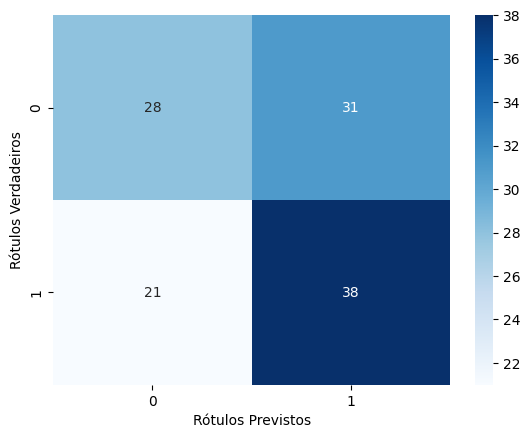

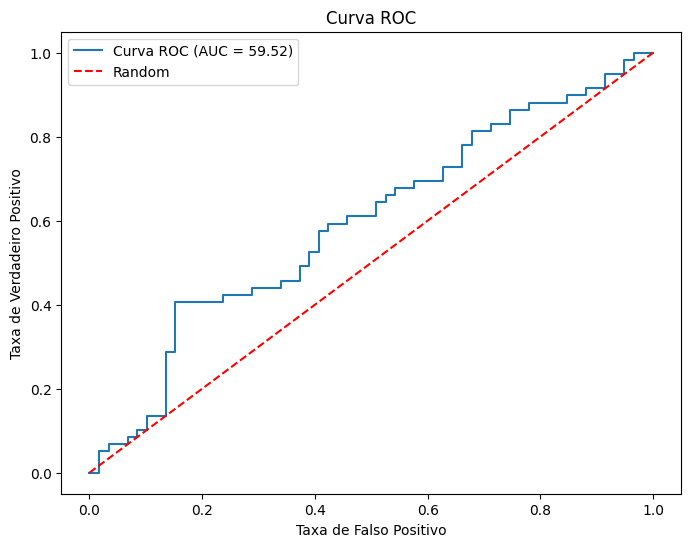

========== Metricas do modelo ==========

Área sob a curva ROC (AUC): 60%
Acuracia: 56%
Recall: 64%
Precisao: 55.07%
F1-score: 59.38%
Erro Absoluto Médio (MAE): 44%
Erro Quadrático Médio (MSE): 44%
Raiz do Erro Quadrático Médio (RMSE): 6.64


In [10]:
seed = 30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=seed)

# Criar o modelo de regressão logística
model = LogisticRegression(random_state=seed)

# Treinar o modelo
model.fit(x_train, y_train)

# Fazer previsões no conjunto de teste
pred = model.predict(x_test)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_test, pred)

# Criar um heatmap da matriz de confusão
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()


# Calcular probabilidades previstas para a curva ROC
y_probs = model.predict_proba(x_test)
y_probs = y_probs[:, 1]  # Probabilidades da classe positiva

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc = roc_auc_score(y_test, y_probs)
auc = auc * 100

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend()
plt.show()


acuracia = accuracy_score(y_test, pred)
acuracia = acuracia * 100

recall = recall_score(y_test, pred)
recall = recall * 100

precisao = precision_score(y_test, pred)
precisao = precisao * 100

f1 = f1_score(y_test, pred)
f1 = f1 * 100

mae = mean_absolute_error(y_test, pred)
mae = mae * 100

mse = mean_squared_error(y_test, pred)
mse = mse * 100

rmse = np.sqrt(mse)
rmse 


print('========== Metricas do modelo ==========')
print(f'\nÁrea sob a curva ROC (AUC): {auc:.0f}%')
print(f'Acuracia: {acuracia:.0f}%')
print(f'Recall: {recall:.0f}%')
print(f'Precisao: {precisao:.2f}%')
print(f'F1-score: {f1:.2f}%')
print(f"Erro Absoluto Médio (MAE): {mae:.0f}%",)
print(f"Erro Quadrático Médio (MSE): {mse:.0f}%")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")



## Modelo Sem Seed Verificando Acuracia K-NN

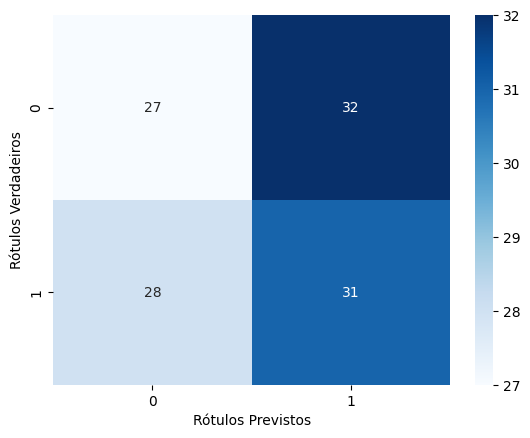

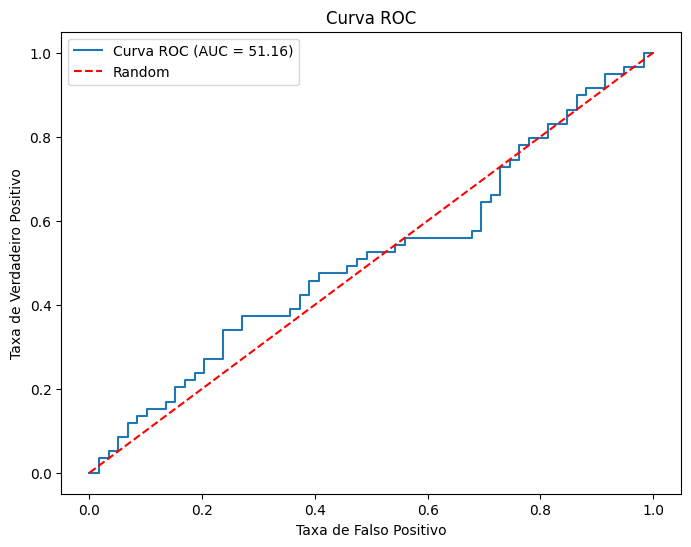

C:\Users\Ronildo\AppData\Local\Temp\ipykernel_7856\1897831486.py:73: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores)


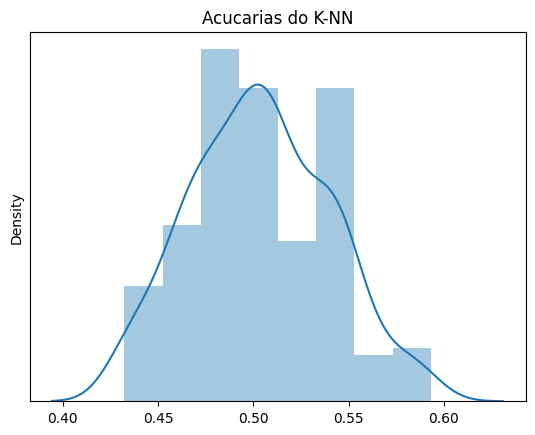

========== Metricas do modelo ==========

Área sob a curva ROC (AUC): 51%
Acuracia: 49%
Recall: 53%
Precisao: 49.21%
F1-score: 50.82%
Erro Absoluto Médio (MAE): 51%
Erro Quadrático Médio (MSE): 51%
Raiz do Erro Quadrático Médio (RMSE): 7.13


In [11]:
scores = []
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

    # Criar o modelo de regressão logística
    model = LogisticRegression()

    # Treinar o modelo
    model.fit(x_train, y_train)

    # Fazer previsões no conjunto de teste
    pred = model.predict(x_test)

    acuracia = accuracy_score(y_test, pred)
    scores.append(acuracia)

    # Calcular a matriz de confusão
    matriz_confusao = confusion_matrix(y_test, pred)

    
    # Calcular probabilidades previstas para a curva ROC
    y_probs = model.predict_proba(x_test)
    y_probs = y_probs[:, 1]  # Probabilidades da classe positiva

    # Calcular a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)


# Criar um heatmap da matriz de confusão
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()


auc = roc_auc_score(y_test, y_probs)
auc = auc * 100


# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend()
plt.show()


acuracia = accuracy_score(y_test, pred)
acuracia = acuracia * 100

recall = recall_score(y_test, pred)
recall = recall * 100

precisao = precision_score(y_test, pred)
precisao = precisao * 100

f1 = f1_score(y_test, pred)
f1 = f1 * 100

mae = mean_absolute_error(y_test, pred)
mae = mae * 100

mse = mean_squared_error(y_test, pred)
mse = mse * 100

rmse = np.sqrt(mse)
rmse 

sns.distplot(scores)
plt.yticks([])
plt.title("Acucarias do K-NN")
plt.show()

print('========== Metricas do modelo ==========')
print(f'\nÁrea sob a curva ROC (AUC): {auc:.0f}%')
print(f'Acuracia: {acuracia:.0f}%')
print(f'Recall: {recall:.0f}%')
print(f'Precisao: {precisao:.2f}%')
print(f'F1-score: {f1:.2f}%')
print(f"Erro Absoluto Médio (MAE): {mae:.0f}%",)
print(f"Erro Quadrático Médio (MSE): {mse:.0f}%")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
